In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_excel('Tourism.xlsx',sheet_name='Tourism')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Multi,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [6]:
#Treating missing values

df['Age'].fillna(value=round(df['Age'].mean()),inplace=True)
df['PreferredLoginDevice'].fillna(value=df['PreferredLoginDevice'].mode().values[0],inplace=True)
df['DurationOfPitch'].fillna(value=round(df['DurationOfPitch'].mean()),inplace=True)
df['NumberOfFollowups'].fillna(value=df['NumberOfFollowups'].mode().values[0],inplace=True)
df['PreferredPropertyStar'].fillna(value=df['PreferredPropertyStar'].mode().values[0],inplace=True)
df['NumberOfTrips'].fillna(value=round(df['NumberOfTrips'].mean()),inplace=True)
df['NumberOfChildrenVisited'].fillna(value=df['NumberOfChildrenVisited'].mode().values[0],inplace=True)
df['MonthlyIncome'].fillna(value=round(df['MonthlyIncome'].mean()),inplace=True)

# Univariate Analysis


In [7]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='black', linestyle='-') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='green', linestyle='--') # Add median to the histogram

C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


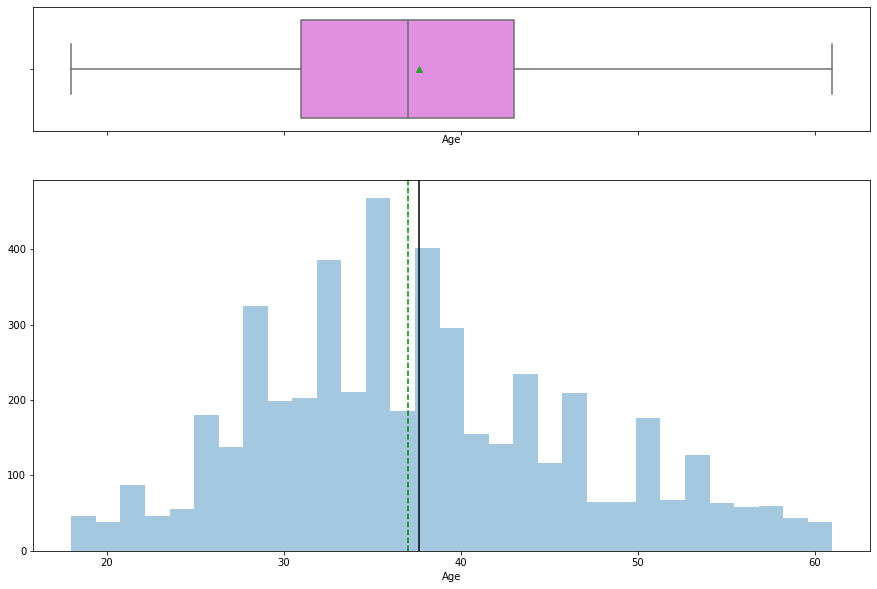

In [8]:
histogram_boxplot(df['Age'])

    1. Age has a normal distribution.
    2. As visible from he boxplot, there are no outliers.

C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


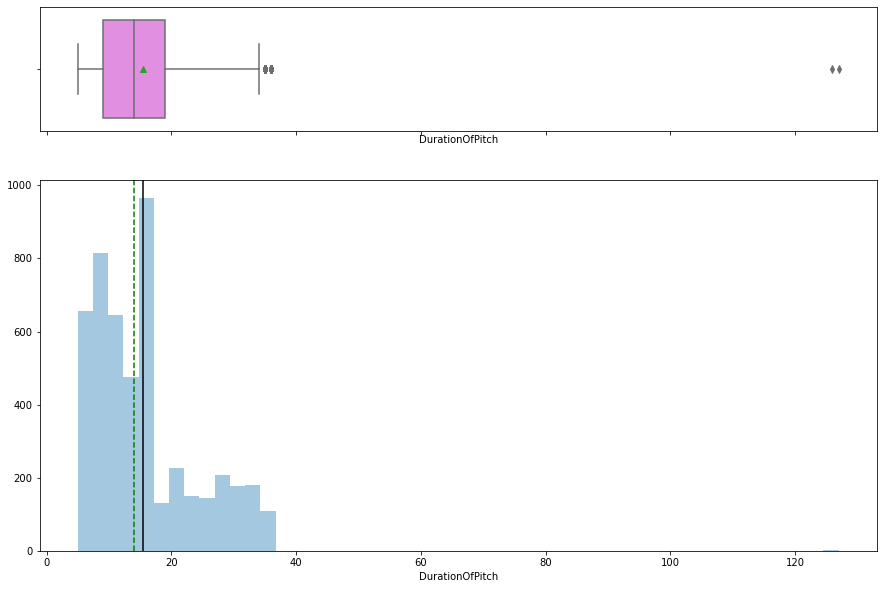

In [9]:
histogram_boxplot(df['DurationOfPitch'])

    1. Duration of pitch is slightly right skewed.
    2. There are outliers present in the dataset.

C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


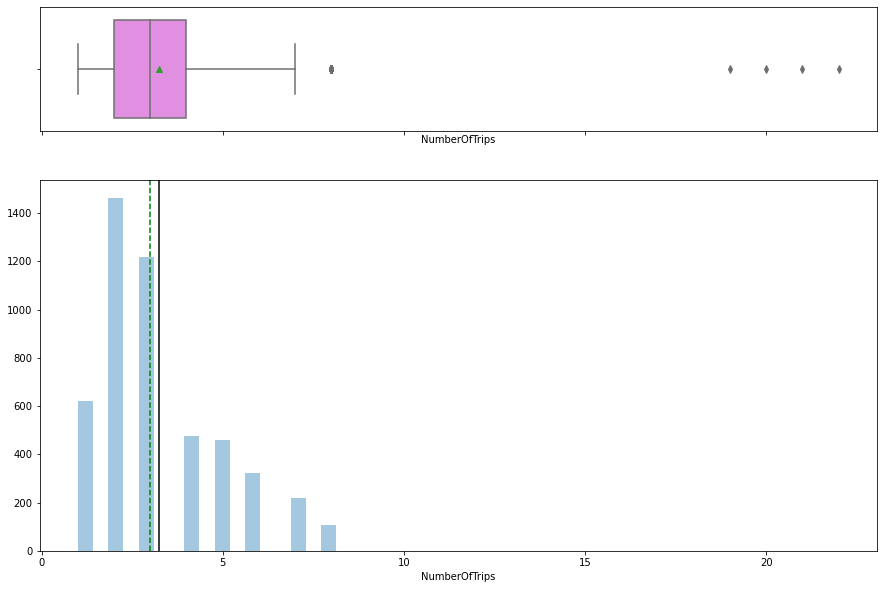

In [10]:
histogram_boxplot(df['NumberOfTrips'])

        1. Number of trips is slighly right skewed.
        2. There are outliers present in the data.

C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


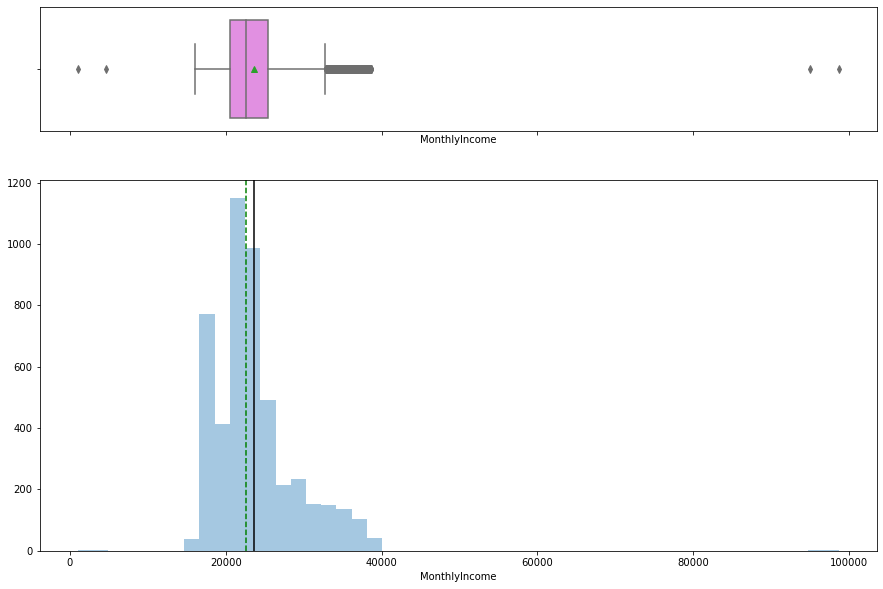

In [11]:
histogram_boxplot(df['MonthlyIncome'])

    1. Monthly income follows an almost normal distribution.
    2. There are outliers present in the data.

In [12]:
def perc_on_bar(feature):
    
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=df)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percentage 
        
    plt.show() # show the plot

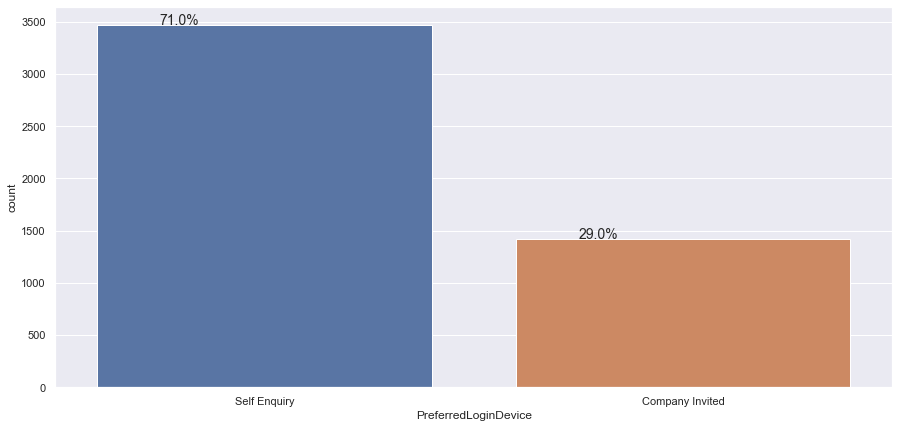

In [13]:
perc_on_bar(df['PreferredLoginDevice'])

    1. Most observations are from Self Enquiries (71%)
    2. Only 29% of observations are Company Invited.

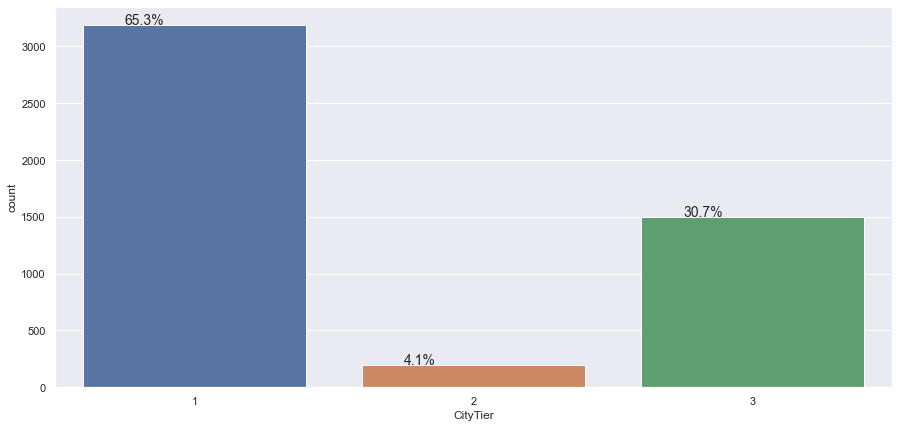

In [14]:
perc_on_bar(df['CityTier'])

    1. City tier 1 has 65.3% of observations.
    2. City tier 2 has only 4.1% of observations.
    3. City tier 3 has 30.7% of observations.

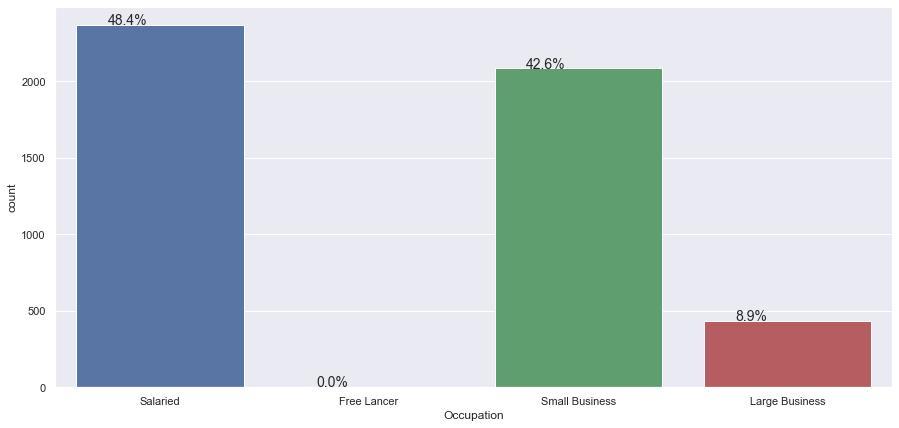

In [15]:
perc_on_bar(df['Occupation'])

    1. Most observations are accounted for by Salaried and Small businesses, at 48.4% and 42.6% respectively.
    2. Large businesses account for 8.9% of observations.
    3. Free lancers have very few observations, accounting for ~0% of data.

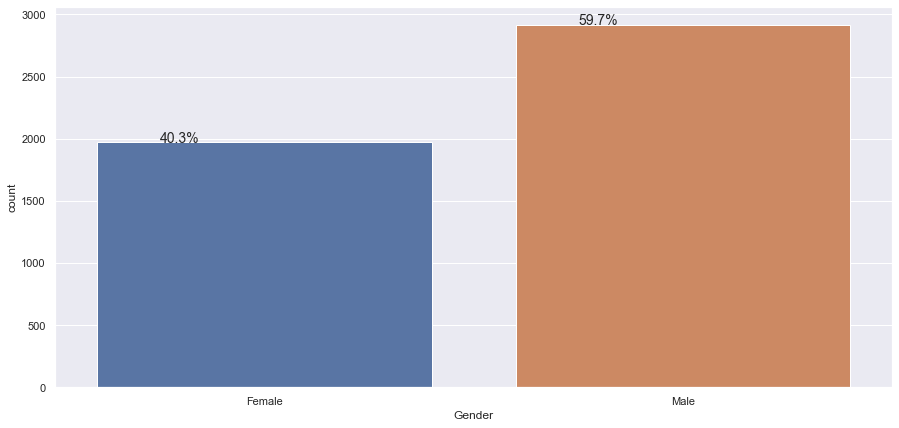

In [16]:
df.replace('Fe Male','Female',inplace=True) #Correcting typos

perc_on_bar(df['Gender'])

    1. Females account for 40.3% of observations.
    2. Males account for 59.7% of observations.

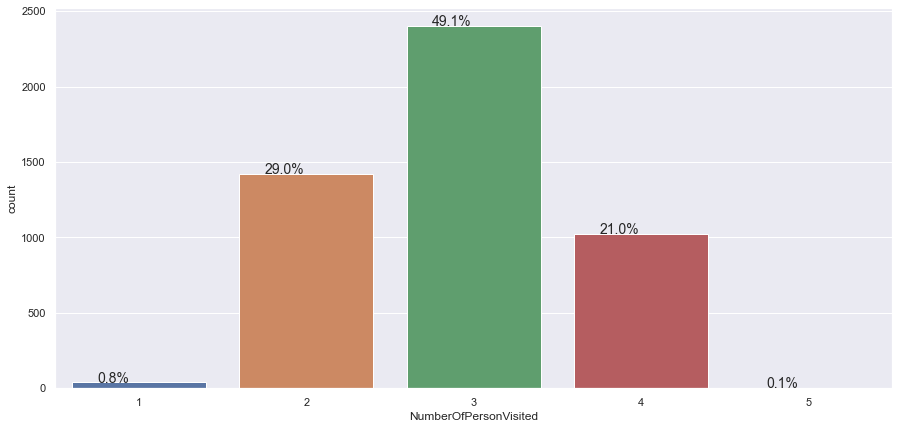

In [17]:
perc_on_bar(df['NumberOfPersonVisited'])

    1. Max observations with 3 people (49.1%)
    2. 2 and 4 have similar number of observations with 29% and 21% respectively.
    3. Solo travellers account for only 0.8% observations.
    4. 5 has the least number of observations, accounting for 0.1% of observations.

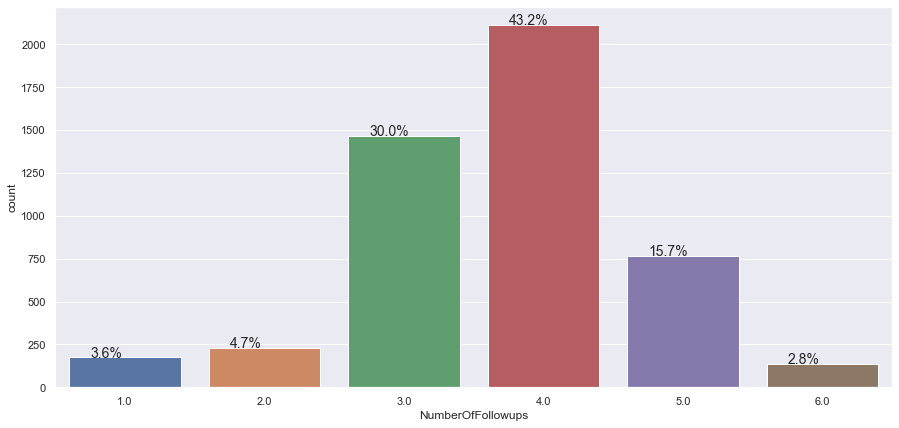

In [18]:
perc_on_bar(df['NumberOfFollowups'])

    1. Most observations with 4 followups (41.7%), followed by 3 (32.5%).
    2. 15% of observations with 5 followups.
    3. 4.5% observations with 2 followups, 3.6% with 1, 2.7% with 6.

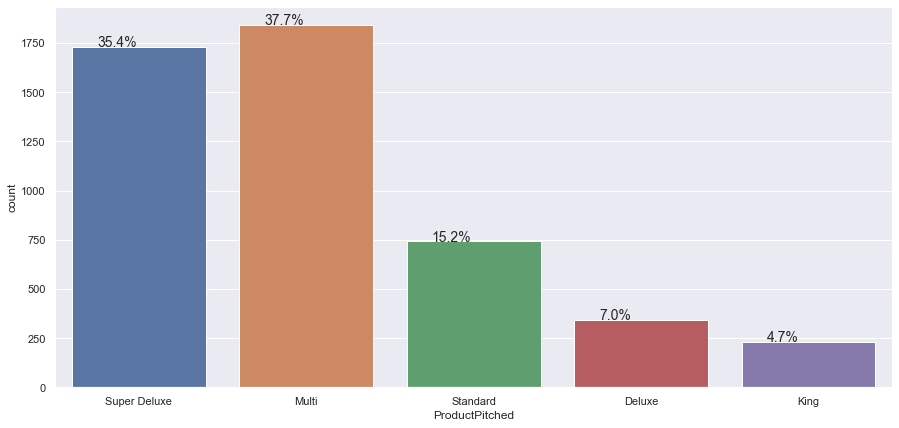

In [19]:
perc_on_bar(df['ProductPitched'])

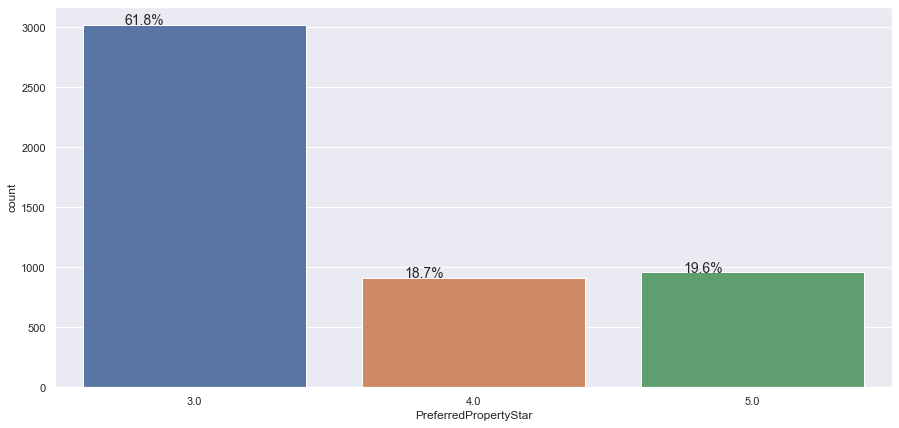

In [20]:
perc_on_bar(df['PreferredPropertyStar'])

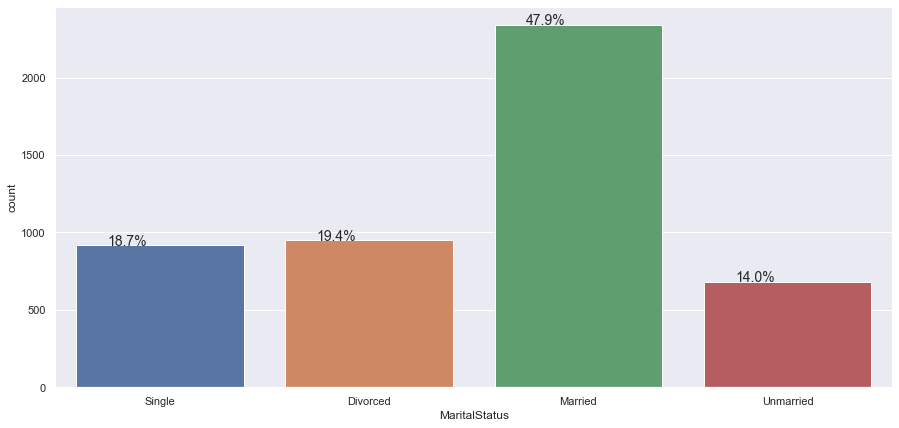

In [21]:
perc_on_bar(df['MaritalStatus'])

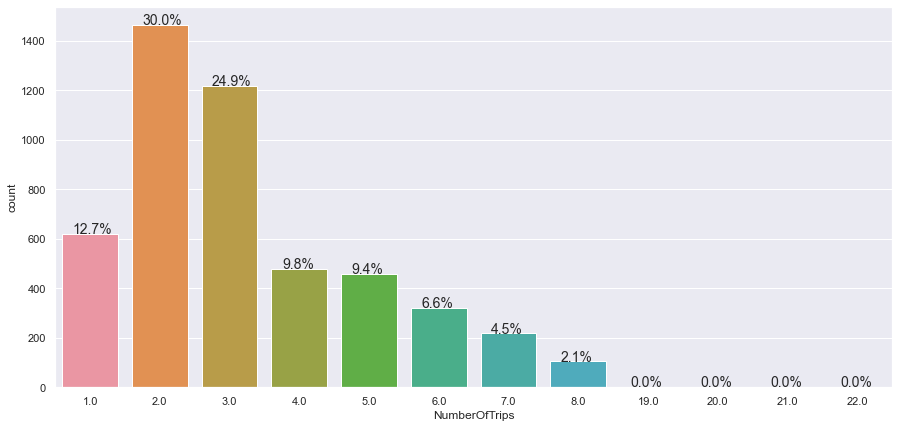

In [22]:
perc_on_bar(df['NumberOfTrips'])

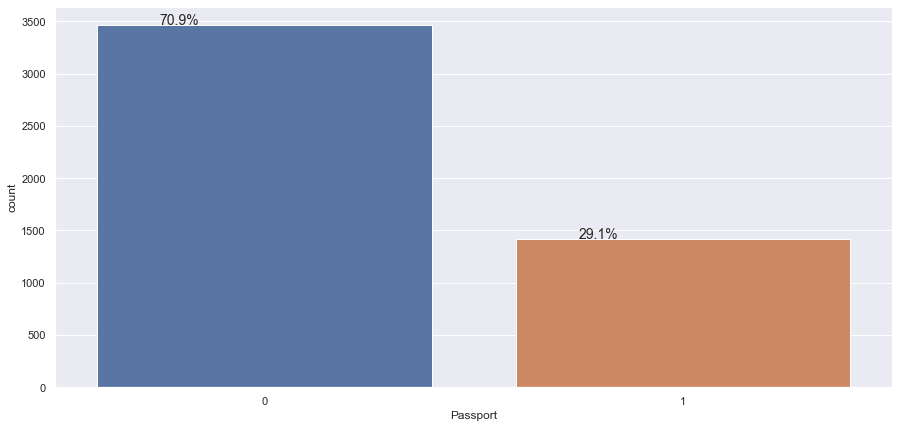

In [23]:
perc_on_bar(df['Passport'])

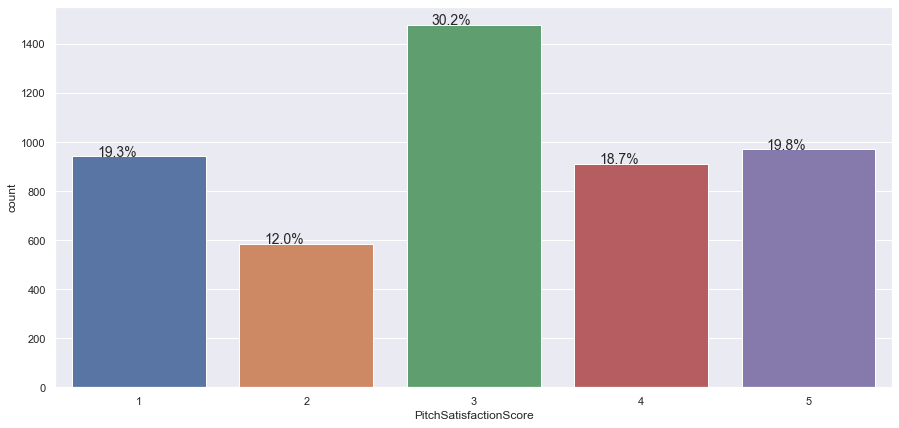

In [24]:
perc_on_bar(df['PitchSatisfactionScore'])

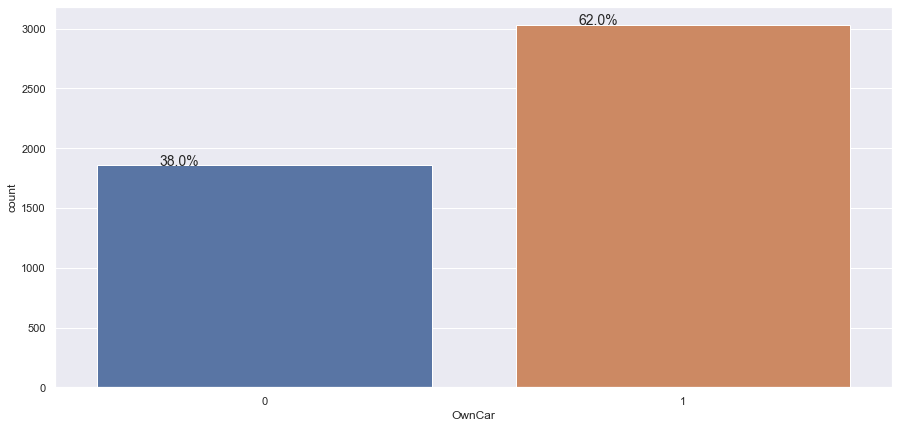

In [25]:
perc_on_bar(df['OwnCar'])

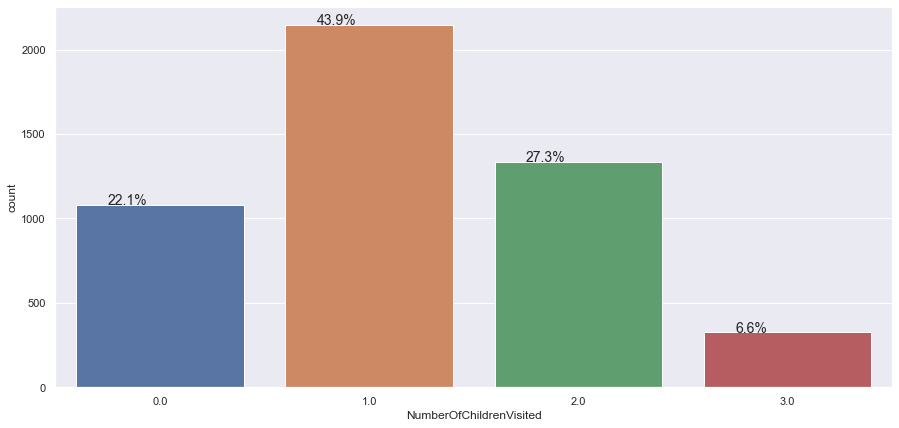

In [26]:
perc_on_bar(df['NumberOfChildrenVisited'])

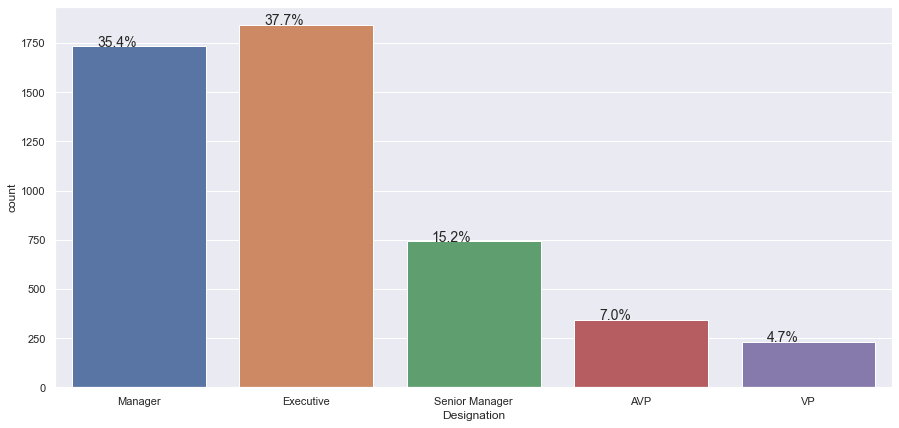

In [27]:
perc_on_bar(df['Designation'])

# Bivariate Analysis

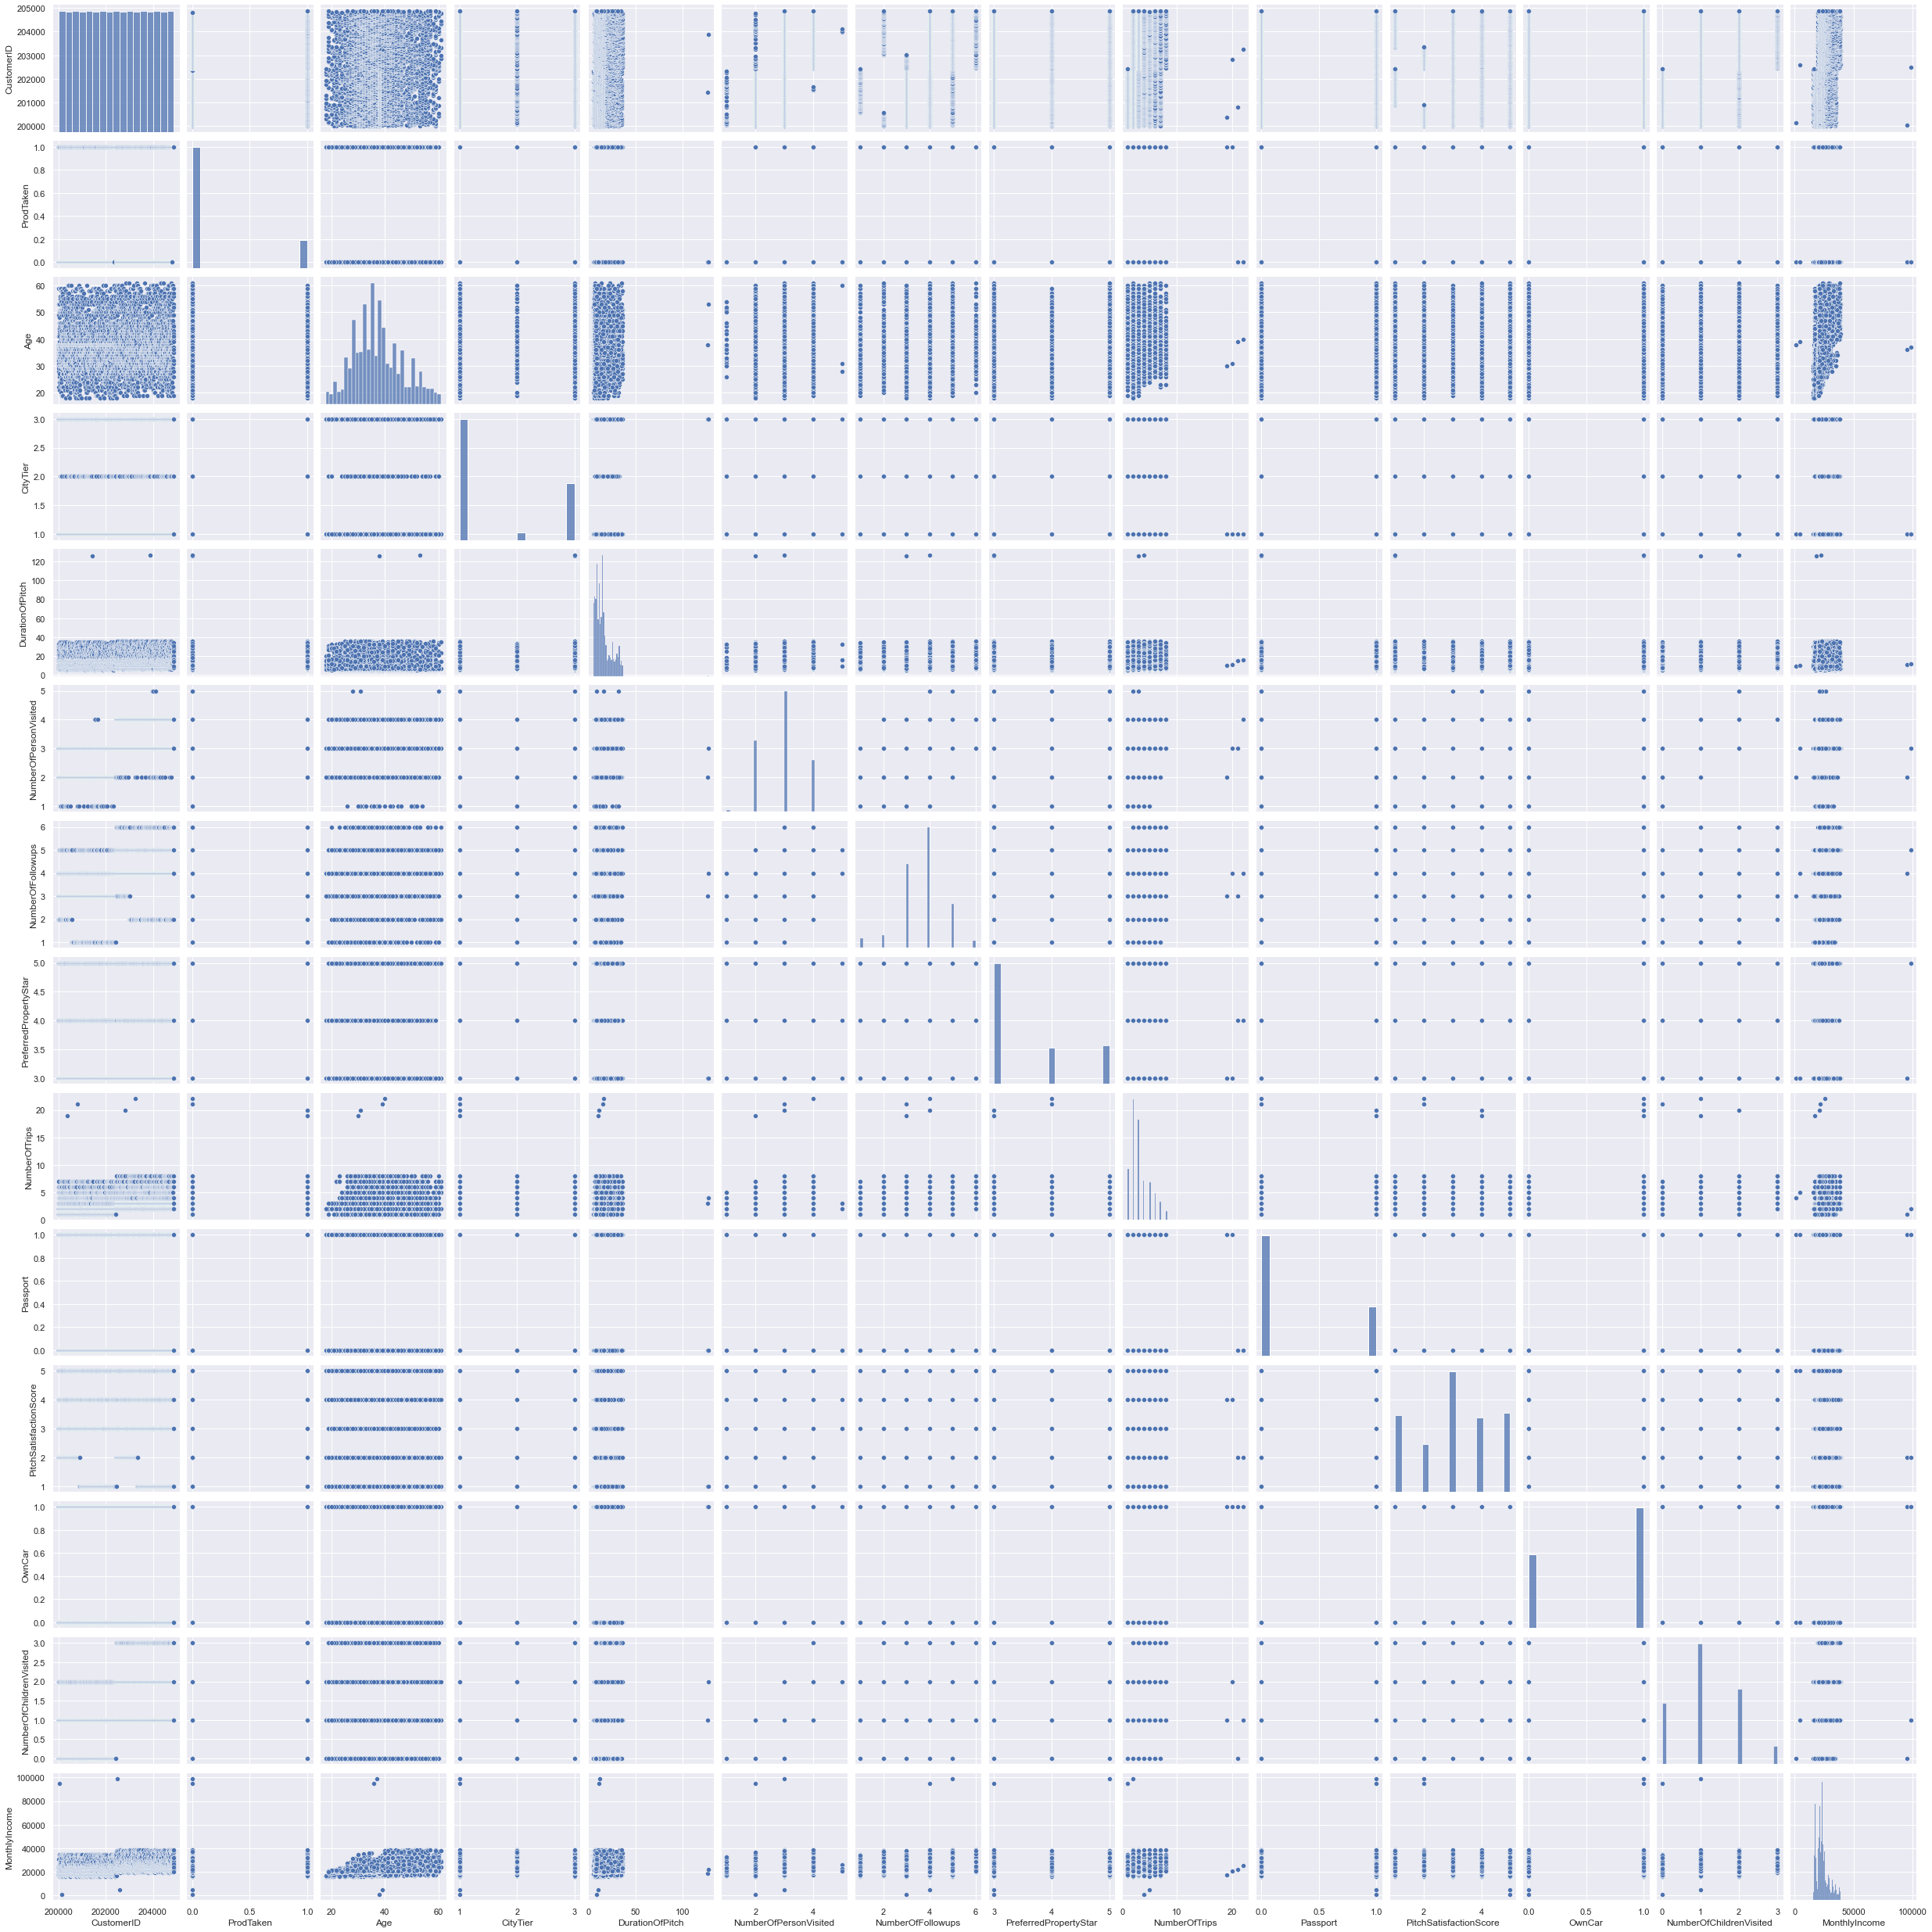

In [28]:
sns.pairplot(df)

<AxesSubplot:>

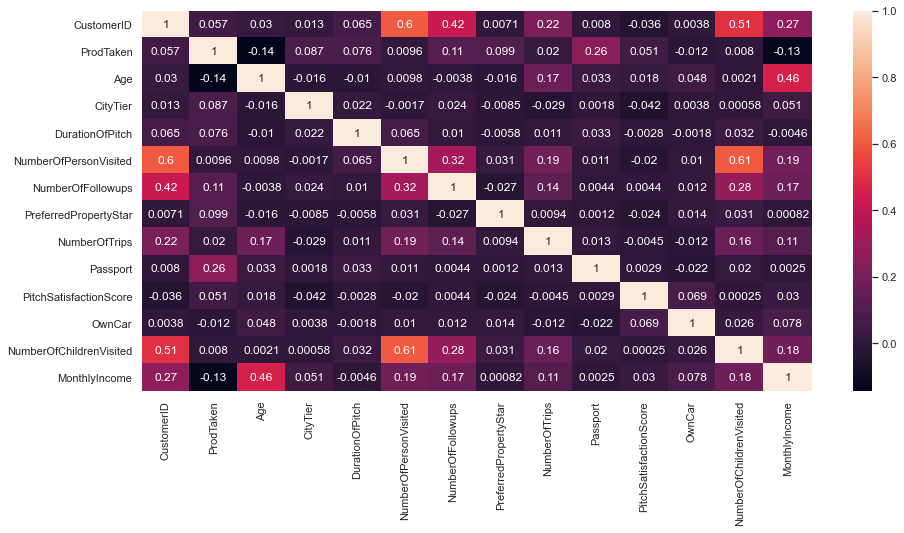

In [29]:
sns.heatmap(df.corr(), annot=True)

    1. Dependent variable has no significant correlation with any other variable.
    2. One significant correlation is between Age and Monthly Income, which is expected.
    3. Another is between NumberOfPersonVisited and NumberOfChildrenVisited, which is also logical.
    

# Perform an Exploratory Data Analysis on the data

C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProductPitched', ylabel='MonthlyIncome'>

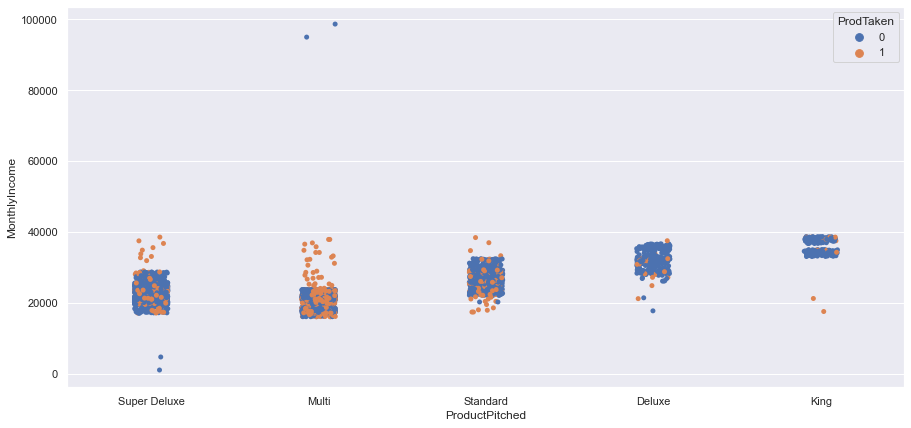

In [30]:
sns.stripplot(df['ProductPitched'],df['MonthlyIncome'],hue=df['ProdTaken'])

    1. Almost everyone with monthly income > ~25k opt for the product 'Multi'
    2. Almost everyone with monthly income > ~30k opt for the product 'Super Deluxe'
    3. People with monthly income < ~22k are more likely to opt for the product 'Standard'
    4. Deluxe and King seem to have very few customers, sales pitch or pricing may need changes, or discounts could be offered.

C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='NumberOfFollowups', ylabel='CustomerID'>

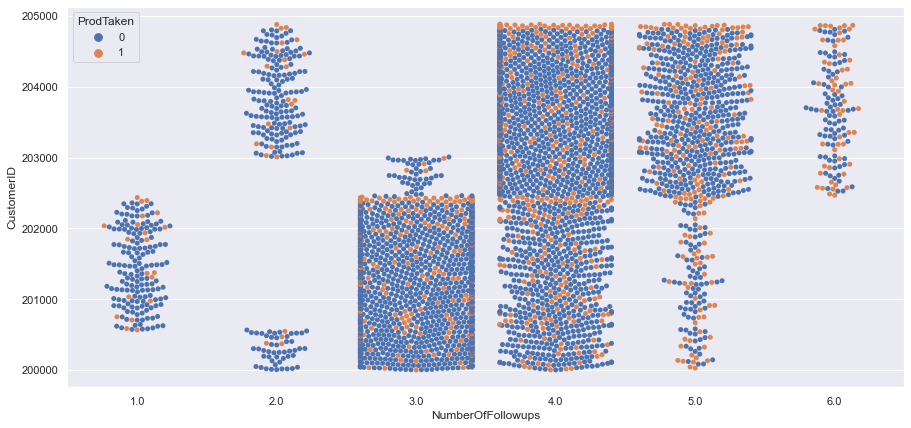

In [31]:
sns.swarmplot(df['NumberOfFollowups'],df['CustomerID'],hue=df['ProdTaken'])

    1. Most customers who opt for the product have >3 followups.
    2. The more the followups, the more the number of customers, suggesting a slight positive correlation.

C:\Users\Chinmay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passport', ylabel='CustomerID'>

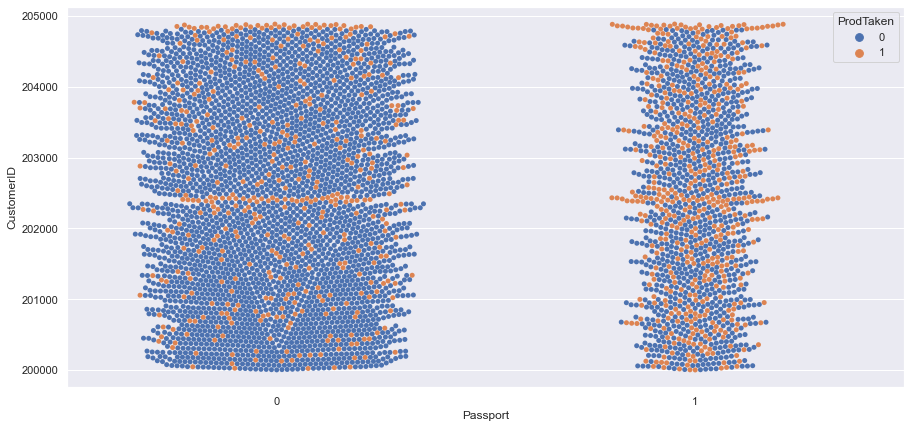

In [32]:
sns.swarmplot(df['Passport'],df['CustomerID'],hue=df['ProdTaken'])

        1. From the above graph, it is clear that people who have passports are more likely purchase a product.
        2. More number of people who own passports should be targetted for marketing.

# Data Pre-processing
## Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4888 non-null   float64
 3   PreferredLoginDevice     4888 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4888 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4888 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4888 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4888 non-null   float64
 14  Passport                

In [34]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].astype('category')
df['CityTier'] = df['CityTier'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['NumberOfPersonVisited'] = df['NumberOfPersonVisited'].astype('category')
df['NumberOfFollowups'] = df['NumberOfFollowups'].astype('category')
df['ProductPitched'] = df['ProductPitched'].astype('category')
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['Passport'] = df['Passport'].astype('category')
df['PitchSatisfactionScore'] = df['PitchSatisfactionScore'].astype('category')
df['OwnCar'] = df['OwnCar'].astype('category')
df['NumberOfChildrenVisited'] = df['NumberOfChildrenVisited'].astype('category')
df['Designation'] = df['Designation'].astype('category')


In [35]:
df = pd.get_dummies(df)
df.head()

,CustomerID,ProdTaken,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome,PreferredLoginDevice_Company Invited,PreferredLoginDevice_Self Enquiry,CityTier_1,CityTier_2,...,OwnCar_1,NumberOfChildrenVisited_0.0,NumberOfChildrenVisited_1.0,NumberOfChildrenVisited_2.0,NumberOfChildrenVisited_3.0,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.0,6.0,1.0,20993.0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
1,200001,0,49.0,14.0,2.0,20130.0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,200002,1,37.0,8.0,7.0,17090.0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0
3,200003,0,33.0,9.0,2.0,17909.0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
4,200004,0,38.0,8.0,1.0,18468.0,0,1,1,0,...,1,1,0,0,0,0,1,0,0,0


In [36]:
X = df.drop('CustomerID',axis=1)
X = X.drop('ProdTaken',axis=1)
y = df['ProdTaken']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [38]:
def plot_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual,y_predict,labels=[0, 1])
    df_cm = pd.DataFrame(cm)
    plt.figure(figsize=(10,7))
    sns.heatmap(df_cm,annot=True,fmt='d')
    plt.ylabel('True Value')
    plt.xlabel('Predicted Value')

In [39]:
def get_metrics_score(model):
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print('Accuracy on training set: ',model.score(X_train,y_train))
    print('Accuracy on testing set: ',model.score(X_test,y_test))
    print('Recall on training set: ',metrics.recall_score(y_train,pred_train))
    print('Recall on testing set: ',metrics.recall_score(y_test,pred_test))
    print('Precision on training set: ',metrics.precision_score(y_train,pred_train))
    print('Precision on testing set: ',metrics.precision_score(y_test,pred_test))
    

# Model building - Bagging
## - Build bagging classifier, random forest and decision tree.

In [40]:
bagging_estimator = BaggingClassifier(random_state=42)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=42)

In [41]:
bagging_estimator_score = get_metrics_score(bagging_estimator)

Accuracy on training set:  0.9938614440222158
Accuracy on testing set:  0.8991138377641446
Recall on training set:  0.9674922600619195
Recall on testing set:  0.583941605839416
Precision on training set:  1.0
Precision on testing set:  0.8247422680412371


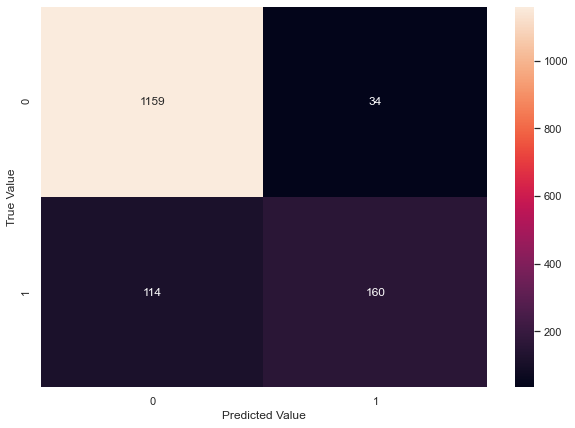

In [42]:
plot_confusion_matrix(bagging_estimator,y_test)

In [43]:
rf_estimator = RandomForestClassifier(random_state=42)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [44]:
rf_estimator_score = get_metrics_score(rf_estimator)

Accuracy on training set:  1.0
Accuracy on testing set:  0.896387184730743
Recall on training set:  1.0
Recall on testing set:  0.49635036496350365
Precision on training set:  1.0
Precision on testing set:  0.9066666666666666


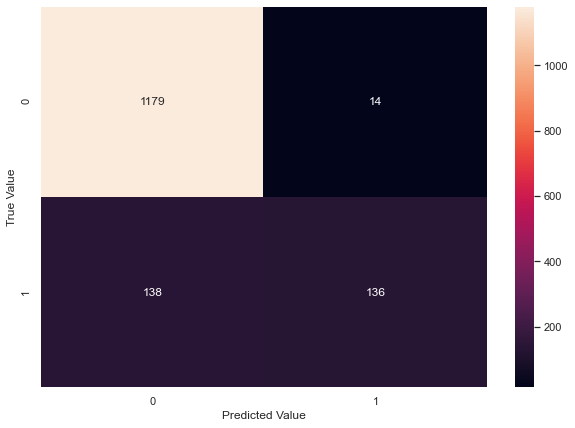

In [45]:
plot_confusion_matrix(rf_estimator,y_test)

In [46]:
dtree_classifier = DecisionTreeClassifier(random_state=42)
dtree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
dtree_score = get_metrics_score(dtree_classifier)

Accuracy on training set:  1.0
Accuracy on testing set:  0.8875255623721882
Recall on training set:  1.0
Recall on testing set:  0.7043795620437956
Precision on training set:  1.0
Precision on testing set:  0.6967509025270758


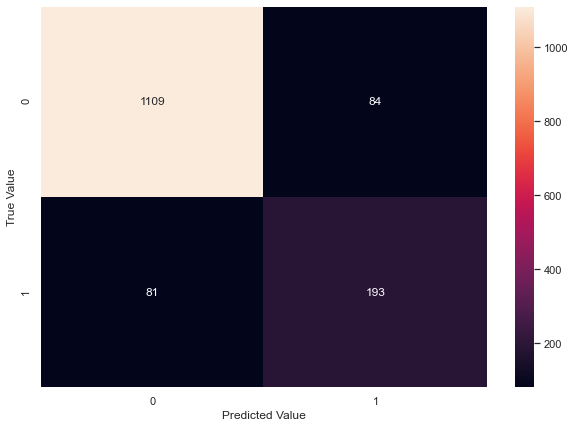

In [48]:
plot_confusion_matrix(dtree_classifier,y_test)

## Comment on which metric is right for model performance evaluation and why?

In this scenario, our aim is to identify potential customers. Hence, we are not bothered about any false positives, as there would be no significant increase in marketing costs incurred. However, false negatives are detrimental since we do not want to miss any potential customers.
Therefore, to minimise false negatives, recall is the ideal metric if evaluating our model.

## Comment on model performance


    1. We find that all our models are overfitting the data.
    2. Highest recall on testing set is observed in our decision tree classifier:
            DecisionTreeClassifier: 70.4%
            RandomForestClassifier: 49.6%
            BaggingClassifier: 58.4%

## Can model performance be improved? check and comment. 

Since all the data is overfitting to our training dataset, we can improve performance by hypertuning and optimising parameters.
One such parameter is class_weights, since dependent variable's dataset is imbalanced.

# Model building - Boosting
## - Build Adaboost, gradient boost, xgboost and stacking classifier

In [49]:
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [50]:
adaboost_classifier_score = get_metrics_score(adaboost_classifier)

Accuracy on training set:  0.8485822858813212
Accuracy on testing set:  0.8391274710293115
Recall on training set:  0.3606811145510836
Recall on testing set:  0.3175182481751825
Precision on training set:  0.6893491124260355
Precision on testing set:  0.6397058823529411


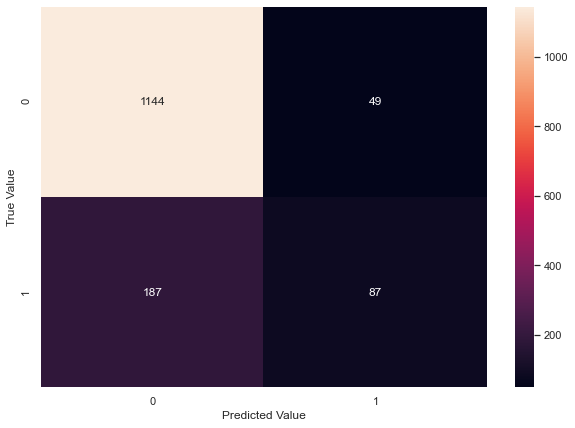

In [51]:
plot_confusion_matrix(adaboost_classifier,y_test)

In [52]:
gradboost_classifier = GradientBoostingClassifier(random_state=42)
gradboost_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [53]:
gradboost_score = get_metrics_score(gradboost_classifier)

Accuracy on training set:  0.8889213680210465
Accuracy on testing set:  0.8609406952965235
Recall on training set:  0.47678018575851394
Recall on testing set:  0.3759124087591241
Precision on training set:  0.88
Precision on testing set:  0.7573529411764706


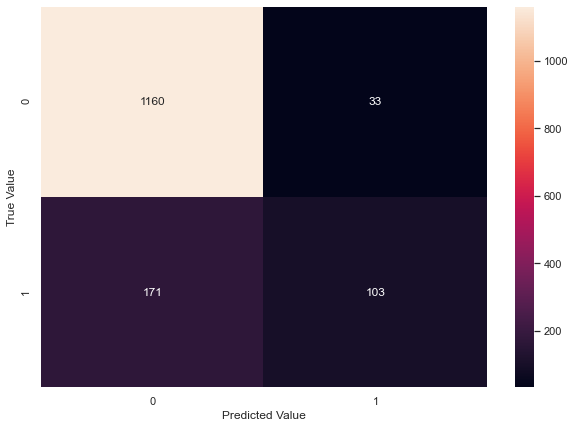

In [54]:
plot_confusion_matrix(gradboost_classifier,y_test)

In [55]:
xgboost_classifier = XGBClassifier(random_state=42,eval_metric='logloss')
xgboost_classifier.fit(X_train,y_train)

C:\Users\Chinmay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [56]:
xgb_score = get_metrics_score(xgboost_classifier)

Accuracy on training set:  1.0
Accuracy on testing set:  0.918200408997955
Recall on training set:  1.0
Recall on testing set:  0.6459854014598541
Precision on training set:  1.0
Precision on testing set:  0.885


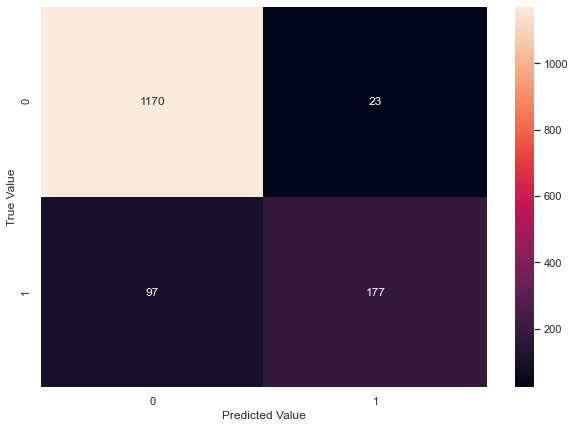

In [57]:
plot_confusion_matrix(xgboost_classifier,y_test)

In [58]:
estimators = [('Bagging Classifier',bagging_estimator),('Random Forest Classifier',rf_estimator),('Decision Tree Classifier',dtree_classifier)]
final_estimator = XGBClassifier(random_state=42)

In [59]:
stacking_estimator = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
stacking_estimator.fit(X_train,y_train)

[02:13:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Chinmay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


StackingClassifier(cv=5,
                   estimators=[('Bagging Classifier',
                                BaggingClassifier(random_state=42)),
                               ('Random Forest Classifier',
                                RandomForestClassifier(random_state=42)),
                               ('Decision Tree Classifier',
                                DecisionTreeClassifier(random_state=42))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=N...
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=No

In [60]:
stacking_estimator_score = get_metrics_score(stacking_estimator)

Accuracy on training set:  0.9997076878105817
Accuracy on testing set:  0.9113837764144512
Recall on training set:  1.0
Recall on testing set:  0.7372262773722628
Precision on training set:  0.9984544049459042
Precision on testing set:  0.7769230769230769


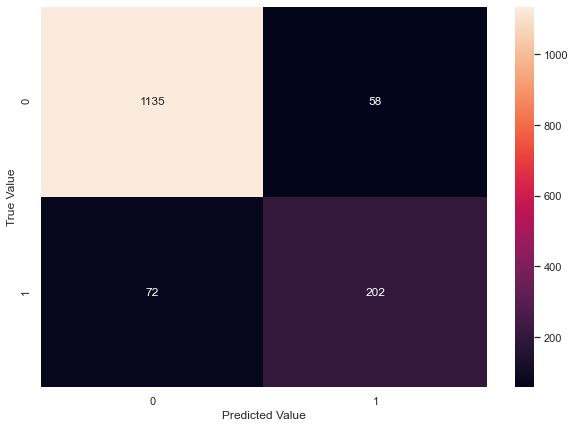

In [61]:
plot_confusion_matrix(stacking_estimator,y_test)

## - Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment

    1. Recall is the ideal metric of evaluation. This is because we need to minimise false negatives, so that we are able to effectively identify potential customers.
    2. We achieve highest recall score on testing set with our stacking classifier model, followed by XGBoost:
            Stacking classifier: 73.7%
            XGB classifier: 64.6%
            Gradient boost: 37.6%
            AdaBoost: 31.8%
    3. The recall score achieved is without hypertuning. Hypertuning will improve the model, although it is computationally expensive.

## - Compare models - Business recommendations and insights

In [62]:
bag_pred = bagging_estimator.predict(X_test)
rfc_pred = rf_estimator.predict(X_test)
dt_pred = dtree_classifier.predict(X_test)
ab_pred = adaboost_classifier.predict(X_test)
gb_pred = gradboost_classifier.predict(X_test)
xgb_pred = xgboost_classifier.predict(X_test)
stack_pred = stacking_estimator.predict(X_test)


# Model Comparison

In [63]:
comparison_frame = pd.DataFrame({'Model':['Bagging Classifier','Random Forest Classifier',
                                          'Decision Tree Classifier','AdaBoost','Gradient Boost',
                                          'XGBoost','Stacking Classifier'],
                                 'Accuracy': [bagging_estimator.score(X_test,y_test),
                                            rf_estimator.score(X_test,y_test), dtree_classifier.score(X_test,y_test),
                                            adaboost_classifier.score(X_test,y_test),gradboost_classifier.score(X_test,y_test),
                                            xgboost_classifier.score(X_test,y_test), stacking_estimator.score(X_test,y_test)],
                                 'Recall': [metrics.recall_score(y_test,bag_pred),metrics.recall_score(y_test,rfc_pred),
                                            metrics.recall_score(y_test,dt_pred),metrics.recall_score(y_test,ab_pred),metrics.recall_score(y_test,gb_pred),
                                            metrics.recall_score(y_test,xgb_pred),metrics.recall_score(y_test,stack_pred)],
                                 'Precision': [metrics.precision_score(y_test,bag_pred),metrics.precision_score(y_test,rfc_pred),
                                               metrics.precision_score(y_test,dt_pred),metrics.precision_score(y_test,ab_pred),
                                               metrics.precision_score(y_test,gb_pred),metrics.precision_score(y_test,xgb_pred),
                                               metrics.precision_score(y_test,stack_pred)]})

#Not the most efficient, but hey, as long as it works

comparison_frame

,Model,Accuracy,Recall,Precision
0,Bagging Classifier,0.899114,0.583942,0.824742
1,Random Forest Classifier,0.896387,0.496350,0.906667
2,Decision Tree Classifier,0.887526,0.704380,0.696751
3,AdaBoost,0.839127,0.317518,0.639706
4,Gradient Boost,0.860941,0.375912,0.757353
5,XGBoost,0.918200,0.645985,0.885000
6,Stacking Classifier,0.911384,0.737226,0.776923


# Business recommendations

1. The model can be used to identify potential customers, providing direction to marketing strategies.
2. People who are likely to purchase a product can be targetted with a sales pitch, improving the odds of them buing the product.
3. The stacking classifier model provides the highest recall at 74%.
   A model with a higher score can be developed by hypertuning, but it is more computationally expensive.
4. EDA provides some insights, significantly:
            -More people owning passports should be targetted.
            -King and Deluxe have very few customers, may require discounts or promotional offers.
            -There are clear distinctions between monthly income and product pitched, suggesting that people in certain income brackets are more likely to purchase certain products.